## Homework exercise 4
## Deadline: upload to Moodle by 19 April 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1:__ Elena Ellmeier_01604087

__Name 2:__ Niklas Geyer_ 11710711

__Name 3:__


The file that you upload should be named *Homework4_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 20 April to earn points for this homework exercise unless you have a valid reason for your absence.

You are allowed to work on this exercise in groups of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Momentum and trading volume
In this exercise, you are asked to obtain some stock market data and to compute and plot returns of certain investment strategies.

1. Please download data (over the whole available time period) for the stock symbols CSCO, GE, F, MSFT, AIG, JPM, AMGN, BRK-A, IBM, and AA for the period 1995 to 2020. Plot the cumulative returns of all of these stocks in a single figure.

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np 
import pandas_datareader.data as web
df0=web.DataReader("CSCO",'yahoo',start='1995',end='2021')
df1=web.DataReader("GE",'yahoo',start='1995',end='2021')
df2=web.DataReader("F",'yahoo',start='1995',end='2021')
df3=web.DataReader("MSFT",'yahoo',start='1995',end='2021')
df4=web.DataReader("AIG",'yahoo',start='1995',end='2021')
df5=web.DataReader("JPM",'yahoo',start='1995',end='2021')
df6=web.DataReader("AMGN",'yahoo',start='1995',end='2021')
df7=web.DataReader("BRK-A",'yahoo',start='1995',end='2021')
df8=web.DataReader("IBM",'yahoo',start='1995',end='2021')
df9=web.DataReader("AA",'yahoo',start='1995',end='2021') 




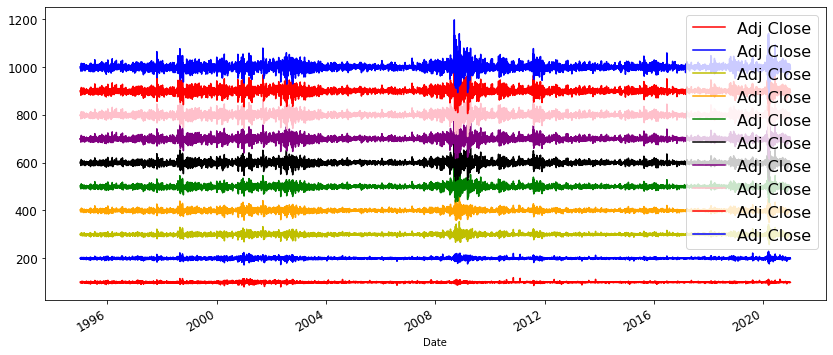

In [346]:
concat = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)


concat1 = pd.DataFrame(concat['Adj Close'])


returns = (concat1 / concat1.shift(-1)).iloc[1:]*100

returns_sum = returns.cumsum(axis=1, skipna = True)

returns_sum



returns_sum.plot(color=['r','b','y','orange','green','black','purple','pink'],figsize = (14,6), fontsize=12)
labels = list(returns_sum)
legend = plt.legend(labels, fontsize = 16)
plt.show()



2. The goal now is to first consider returns of simple momentum/reversal investment strategies. A momentaum (reversal) strategy invests in recent winners (losers) and takes a short position in recent losers (winners). Assume that whenever you change your portfolio (i.e. at the opening price on every day, week, or month), you invest the same amount in each position, and compute the returns of strategies that

* every day take a long position in the previous day's 5 worst performing stocks and a short position in the previous day's 5 best performing stocks.

* every week take a long position in the previous week's 5 worst performing stocks and a short position in the previous week's 5 best performing stocks.

* every month __t__ take a long position in the 5 stocks performing best during the months __t-6__ to __t-2__ and a short position in the 5 stocks performing worst during that period.

Plot the cumulative returns of each of these strategies and provide descriptive statistics of the one-period returns.

In [297]:

# For every day performance

daily = concat1.copy()
daily['Return day'] = 0.

#I assume that with this strategy I want to buy the worst performing stocks and sell the best performing stocks
#since we did not define a time frame for rebuying or reselling the stocks, I assumed that we follow this strategy in each period, every day in this setting

i=1
for idx, row in daily.iterrows():
    if i >= daily.shape[0]:
        break
    sorted = row[:10].sort_values()
    long = sorted[:5]
    short = sorted[5:]
    daily.iat[i,10]= short.sum()-long.sum()
    i += 1

daily



,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Return day
Date,,,,,,,,,,,
1995-01-03,1.407672,4.119593,4.380183,2.389259,200.543488,5.672602,5.761800,20400,11.101995,17.581966,0.000000
1995-01-04,1.417985,4.119593,4.498034,2.406627,198.247299,5.770408,5.792712,20550,11.196076,17.614931,20617.019940
1995-01-05,1.407672,4.129690,4.458752,2.366929,197.992081,5.829088,5.934903,20500,11.139625,17.532507,20764.638372
1995-01-06,1.407672,4.109495,4.458752,2.406627,197.992081,5.848648,5.798893,20600,11.308977,18.010592,20714.406984
1995-01-09,1.438611,4.069108,4.537320,2.391740,198.247299,5.887768,5.724709,21200,11.365431,18.200176,20814.978858
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,43.867199,10.642152,8.860000,222.238144,37.123131,122.905769,221.284622,340262,123.045761,21.959999,337264.557232
2020-12-28,44.241459,10.632160,8.890000,224.443069,36.825111,123.715141,221.999313,342601,123.174042,22.240000,340829.021816
2020-12-29,43.965687,10.552218,8.820000,223.634918,36.914516,123.389427,225.195541,344820,122.167496,22.040001,343171.502835


In [347]:
#For weekly performance 

weekly = concat1.resample("W").last()
weekly['Return week'] = 0.0

i=0
prev_week = None
for idx, row in weekly.iterrows():
    if i >= weekly.shape[0]:
        break
    if i > 0:
        returns = (row / prev_week)*100
        sorted_idx = returns[:10].argsort()
        sorted = row[:10]
        sorted = sorted[sorted_idx]
        long = sorted[:5]
        short = sorted[5:]
        weekly.iat[i,10]= short.sum()-long.sum()
    prev_week = row
    i += 1

weekly

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Return week
Date,,,,,,,,,,,
1995-01-08,1.407672,4.109495,4.458752,2.406627,197.992081,5.848648,5.798893,20600,11.308977,18.010592,0.000000
1995-01-15,1.479861,4.200371,4.498034,2.490982,208.708130,6.005136,5.730890,22300,11.497145,18.356779,22474.400890
1995-01-22,1.443766,4.119593,4.144477,2.446323,204.370804,5.731285,5.712342,23350,11.346609,17.738577,23140.195958
1995-01-29,1.397359,4.079207,4.027230,2.376853,214.831619,6.063816,6.070910,23700,10.913826,16.691736,23895.638548
1995-02-05,1.469548,4.210467,4.086745,2.386778,216.107437,6.200742,6.219284,24300,11.233712,17.315475,24099.228218
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,43.709614,10.861990,9.340000,213.867432,40.095467,120.754036,227.518280,347000,125.522659,23.730000,-347559.925337
2020-12-13,43.650520,11.141526,9.020000,212.769943,38.533749,118.010071,225.721634,340064,122.631294,22.840000,340246.248509
2020-12-20,44.753601,10.802034,8.950000,218.087708,37.232403,117.536301,226.803604,337900,124.190460,22.010000,-337247.622764


In [348]:
#For monthly performance 


monthly = concat1.resample("M").last()
monthly['Return month'] = 0.0


i=0
prev_month = None
for idx, row in monthly.iterrows():
    if i >= concat1.shape[0]:
        break
    if i > 0:
        returns = (row / prev_month)*100
        sorted_idx = returns[:10].argsort()
        sorted = row[:10]
        sorted = sorted[sorted_idx]
        long = sorted[:5]
        short = sorted[5:]
        monthly.iat[i,10]= short.sum()-long.sum()
    prev_month = row
    i += 1

monthly

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Return month
Date,,,,,,,,,,,
1995-01-31,1.376735,4.159981,4.007390,2.357004,212.535400,6.102939,6.293469,24600,10.857374,16.246202,0.000000
1995-02-28,1.392204,4.422506,4.146261,2.500906,212.003479,6.278983,6.825138,22275,11.365869,16.163326,-22481.577311
1995-03-31,1.572675,4.394832,4.265291,2.823443,212.769806,5.975627,6.664399,22650,12.404283,17.124840,-22841.614132
1995-04-30,1.644863,4.557607,4.354052,3.245224,218.133759,6.608799,7.189887,21600,14.292295,18.467630,-21778.886446
1995-05-31,1.804709,4.720375,4.695152,3.361834,232.697937,7.301345,7.171339,22700,14.084220,19.294481,22897.866895
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,41.202209,6.319061,6.820000,224.424194,28.396612,97.981979,249.753784,327560,119.944695,14.620000,327760.771544
2020-09-30,38.440430,6.219687,6.660000,209.298721,27.127750,94.148361,250.581955,320001,118.349457,11.630000,320002.165836
2020-10-31,35.357712,7.407717,7.730000,201.477280,31.029890,96.769051,213.885925,302500,108.612648,12.920000,-302903.476907


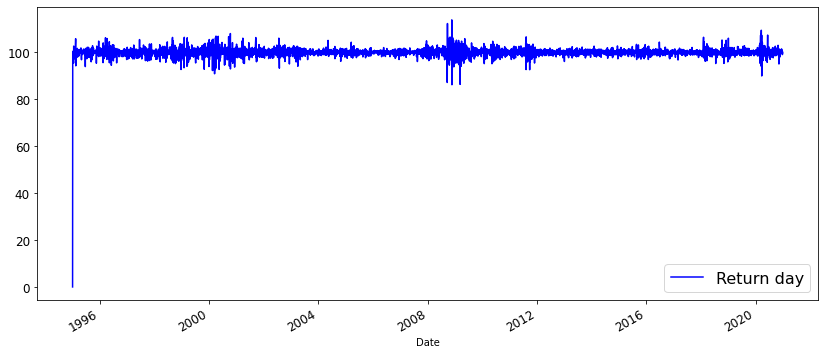

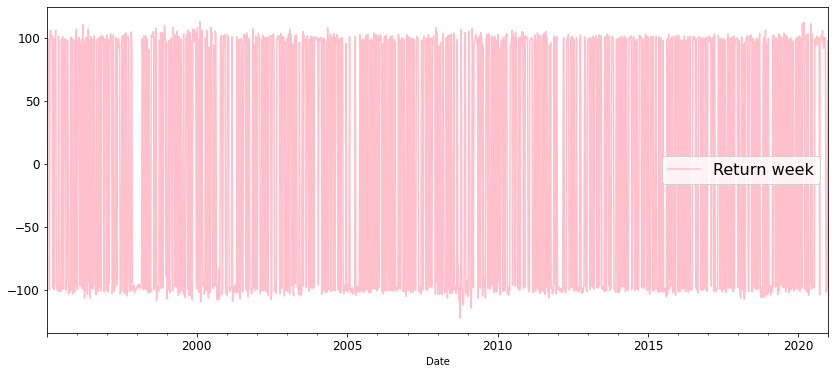

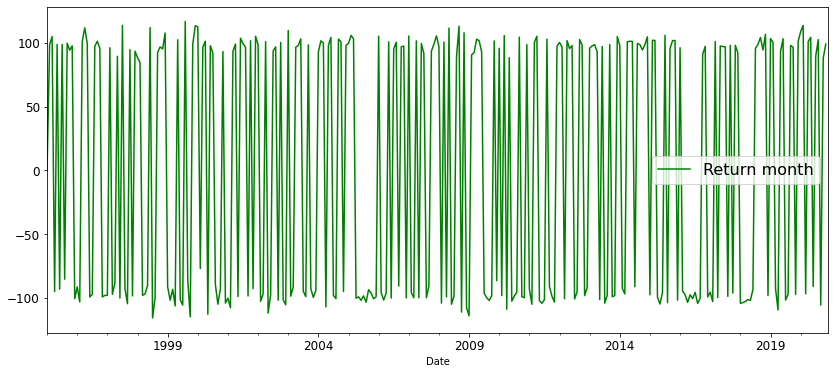

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,100.050974,100.502428,98.922801,102.833983,99.451151,99.169118,99.303636,99.508872,100.752085
std,8.628610,13.192667,8.722865,35.035815,9.391495,7.900620,5.497301,7.654164,14.502628
min,72.888013,43.979940,71.033807,28.987423,75.236475,71.966512,76.923077,73.866213,64.924625
25%,95.240113,94.727172,94.227593,95.288855,93.913272,94.699498,96.463338,95.041172,92.803827
50%,99.763861,99.886116,97.993949,99.182149,98.305512,98.693453,99.228395,99.205655,99.549541
75%,104.041475,105.288704,103.757016,104.300424,103.141454,103.685276,101.882512,103.455312,105.849166
max,138.469389,237.442961,152.329710,638.880168,144.047575,121.871811,116.727273,130.997151,225.162341


In [353]:
#daily


returns_strat = (daily / daily.shift(-1))*100

returns_strat_sum = returns_strat.cumsum(axis=1, skipna = True)

returns_strat

#weekly


returns_weekly = (weekly / weekly.shift(-1))*100

returns_weekly_sum = returns_weekly.cumsum(axis=1, skipna = True)

returns_weekly

#monthly

returns_monthly = (monthly/ monthly.shift(-1))*100

returns_monthly_sum = returns_monthly.cumsum(axis=1, skipna = True)

returns_monthly

#plot

returns_strat["Return day"].plot(color=['b'],figsize = (14,6), fontsize=12)
legend = plt.legend(fontsize = 16)
plt.show()

returns_weekly["Return week"].plot(color=['pink'],figsize = (14,6), fontsize=12)
legend = plt.legend(fontsize = 16)
plt.show()


returns_monthly["Return month"].plot(color=['green'],figsize = (14,6), fontsize=12)
legend = plt.legend(fontsize = 16)
plt.show()

#descriptive statistics

returns_strat.iloc[:,1:10].describe()
returns_weekly.iloc[:,1:10].describe()
returns_monthly.iloc[:,1:10].describe()

3. We next consider a refinement of the above strategies that takes the trading volume in each stock, relative to the stocks' own historical volume, into account. To prepare for this step, compute for each stock

* every day the trading volume (in shares) on that day relative to the trading volume on the previous 10 trading days
* every week the trading volume (in shares) in that week relative to the trading volume during the previous 4 weeks
* every month the trading volume (in shares) during the months __t-6__ to __t-2__ relative to the trading volume in the previous 10 months

Next, adjust the investment strategies from 2. such that you always take long and short positions, respectively, in the 2 among the 5 stocks that had the highest recent trading volume (relative to their past volumes, computed as above).

Plot the cumulative returns of each of these strategies and provide descriptive statistics of the one-period returns.

In [354]:
# trading value on one day/ trading value 10 days before that day summed up 


#b
concat_vol = pd.DataFrame(concat['Volume'])


concat_vol['Volume'] = concat_vol/concat_vol.rolling(window = 10).mean().shift(-1)

concat_vol.head(20)

#b
combine = pd.concat([daily, concat_vol], axis=1)

combine['Return Day'] = 0.0

i=1
for idx, row in combine.iterrows():
    if i >= combine.shape[0]:
        break
    sort_idx = row[:10].argsort()
    long_idx = sort_idx[:5]
    short_idx = sort_idx[5:]
    volumes = row[10:20]
    long = volumes[long_idx].sort_values()[3:]
    short = volumes[short_idx].sort_values()[3:]
    combine.iat[i,21]= short.sum()-long.sum()
    i += 1
combine



,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Return Day
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-03,1.407672,4.119593,4.380183,2.389259,200.543488,5.672602,5.761800,20400,11.101995,17.581966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-04,1.417985,4.119593,4.498034,2.406627,198.247299,5.770408,5.792712,20550,11.196076,17.614931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-05,1.407672,4.129690,4.458752,2.366929,197.992081,5.829088,5.934903,20500,11.139625,17.532507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-06,1.407672,4.109495,4.458752,2.406627,197.992081,5.848648,5.798893,20600,11.308977,18.010592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-09,1.438611,4.069108,4.537320,2.391740,198.247299,5.887768,5.724709,21200,11.365431,18.200176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,43.867199,10.642152,8.860000,222.238144,37.123131,122.905769,221.284622,340262,123.045761,21.959999,...,0.416630,0.487506,0.359245,0.354596,0.289695,0.359759,4.565949e-07,0.388331,202886.792453,-336341.165842
2020-12-28,44.241459,10.632160,8.890000,224.443069,36.825111,123.715141,221.999313,342601,123.174042,22.240000,...,0.774082,0.713471,0.635279,0.841214,0.576428,0.592908,1.183726e-06,0.849490,833865.384615,-337264.126597
2020-12-29,43.965687,10.552218,8.820000,223.634918,36.914516,123.389427,225.195541,344820,122.167496,22.040001,...,0.804978,0.747228,0.631587,0.902519,0.622105,0.637459,7.270929e-07,0.834894,712857.142857,-340828.316621


In [355]:
#this week compared to last 4 weeks

#a
concatVol = pd.DataFrame(concat['Volume'])
concatVol.head(20)
concat_week = concatVol.resample("W").last()
concat_week

concat_week['Volume'] = concat_week/concat_week.rolling(window = 4).mean().shift(-1)
concat_week

#b

combine1 = pd.concat([weekly, concat_week], axis=1)

combine1
combine1['Return Weekly'] = 0.0

i=1
for idx, row in combine1.iterrows():
    if i >= combine1.shape[0]:
        break
    sort_idx = row[:10].argsort()
    long_idx = sort_idx[:5]
    short_idx = sort_idx[5:]
    volumes = row[10:20]
    long = volumes[long_idx].sort_values()[3:]
    short = volumes[short_idx].sort_values()[3:]
    combine1.iat[i,21]= short.sum()-long.sum()
    i += 1
    
combine1

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Return Weekly
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-08,1.407672,4.109495,4.458752,2.406627,197.992081,5.848648,5.798893,20600,11.308977,18.010592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-15,1.479861,4.200371,4.498034,2.490982,208.708130,6.005136,5.730890,22300,11.497145,18.356779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-01-22,1.443766,4.119593,4.144477,2.446323,204.370804,5.731285,5.712342,23350,11.346609,17.738577,...,1.770137,2.221658,1.440656,1.061394,0.909418,0.755082,1.079011e-05,6.214243,6.097873e+03,0.000000
1995-01-29,1.397359,4.079207,4.027230,2.376853,214.831619,6.063816,6.070910,23700,10.913826,16.691736,...,0.589348,0.598148,0.963281,1.024636,0.720498,0.724868,1.879063e-05,4.996129,7.272591e+03,-23134.762717
1995-02-05,1.469548,4.210467,4.086745,2.386778,216.107437,6.200742,6.219284,24300,11.233712,17.315475,...,1.109649,1.104797,0.961632,1.221832,1.564216,1.051315,2.363996e-05,5.375237,1.701502e+04,-23890.703774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,43.709614,10.861990,9.340000,213.867432,40.095467,120.754036,227.518280,347000,125.522659,23.730000,...,1.507363,0.942103,1.060895,1.049962,1.285489,0.925437,1.401894e-06,0.988664,2.565933e+06,0.085770
2020-12-13,43.650520,11.141526,9.020000,212.769943,38.533749,118.010071,225.721634,340064,122.631294,22.840000,...,0.905903,1.283704,0.928135,0.998098,0.682459,0.695393,4.071620e-07,0.788566,1.448800e+06,-0.281386
2020-12-20,44.753601,10.802034,8.950000,218.087708,37.232403,117.536301,226.803604,337900,124.190460,22.010000,...,1.244583,1.376370,1.956139,1.786823,2.043207,2.166550,1.449418e-06,1.505464,1.208753e+06,-340244.894843


In [356]:
#last 5 months in comparison to last ten months 

#a
concatVolume = pd.DataFrame(concat['Volume'])
concat_month = concatVolume.resample("M").last()


concat_month['Volume'] = concat_month.rolling(window = 5).mean()/concat_month.rolling(window = 10).mean().shift(-1)
concat_month.tail(20)

#b
combine2 = pd.concat([monthly, concat_month], axis=1)

combine2['Return Monthly'] = 0.0

i=1
for idx, row in combine2.iterrows():
    if i >= combine2.shape[0]:
        break
    sort_idx = row[:10].argsort()
    long_idx = sort_idx[:5]
    short_idx = sort_idx[5:]
    volumes = row[10:20]
    long = volumes[long_idx].sort_values()[3:]
    short = volumes[short_idx].sort_values()[3:]
    combine2.iat[i,21]= short.sum()-long.sum()
    i += 1
    
combine2


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Volume,Return Monthly
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-31,1.376735,4.159981,4.007390,2.357004,212.535400,6.102939,6.293469,24600,10.857374,16.246202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-02-28,1.392204,4.422506,4.146261,2.500906,212.003479,6.278983,6.825138,22275,11.365869,16.163326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-03-31,1.572675,4.394832,4.265291,2.823443,212.769806,5.975627,6.664399,22650,12.404283,17.124840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-04-30,1.644863,4.557607,4.354052,3.245224,218.133759,6.608799,7.189887,21600,14.292295,18.467630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1995-05-31,1.804709,4.720375,4.695152,3.361834,232.697937,7.301345,7.171339,22700,14.084220,19.294481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,41.202209,6.319061,6.820000,224.424194,28.396612,97.981979,249.753784,327560,119.944695,14.620000,...,1.133505,0.909287,0.888142,0.991196,0.939040,0.998453,0.772948,1.023299,0.977778,-293578.712180
2020-09-30,38.440430,6.219687,6.660000,209.298721,27.127750,94.148361,250.581955,320001,118.349457,11.630000,...,0.960062,0.786312,0.773169,0.907183,0.876513,0.853328,0.645555,0.866435,1.043478,-327759.915399
2020-10-31,35.357712,7.407717,7.730000,201.477280,31.029890,96.769051,213.885925,302500,108.612648,12.920000,...,0.880997,0.743601,0.756803,0.832520,0.761078,0.827154,0.774222,0.823782,0.977778,-320001.342204


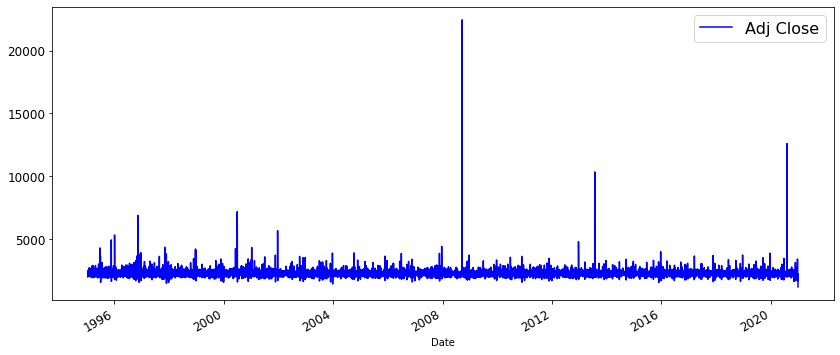

In [340]:
#daily returns and plot

returns_combine = (combine / combine.shift(-1))*100

returns_combine = returns_combine.cumsum(axis=1, skipna = True)

returns_combine

returns_combine["Return Day"].plot(color=['b'],figsize = (14,6), fontsize=12)
labels = list(returns_strat)
legend = plt.legend(labels, fontsize = 16)
plt.show()





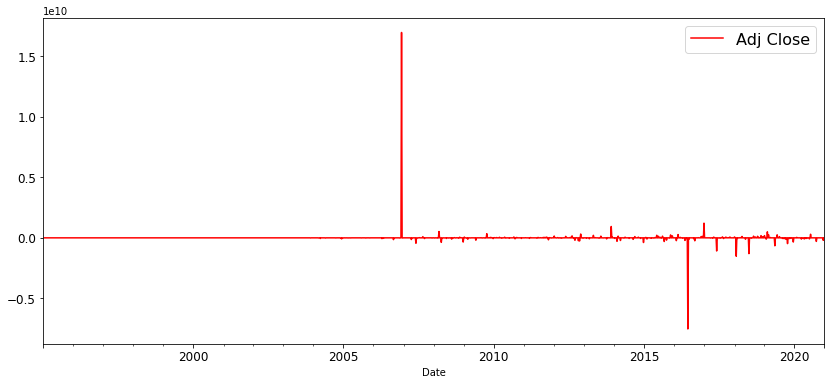

In [357]:
#weekly returns and plot

returns_combine1 = (combine1 / combine1.shift(-1))*100

returns_combine1 = returns_combine1.cumsum(axis=1, skipna = True)

returns_combine1

returns_combine1["Return Weekly"].plot(color=['r'],figsize = (14,6), fontsize=12)
labels = list(returns_strat)
legend = plt.legend(labels, fontsize = 16)
plt.show()


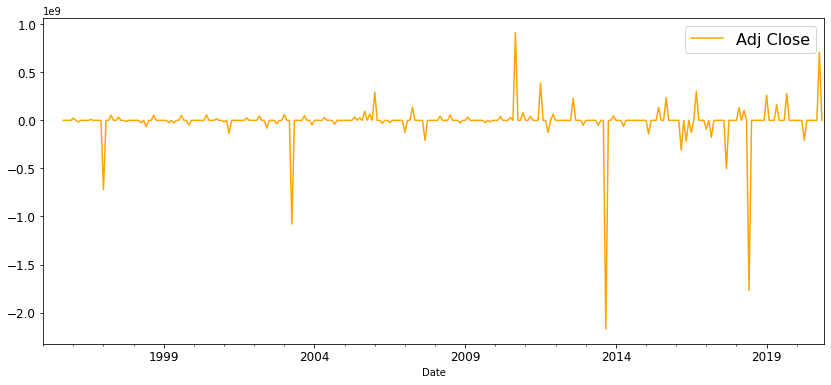

In [358]:
#monthly returns and plot

returns_combine2 = (combine2 / combine2.shift(-1))*100

returns_combine2 = returns_combine2.cumsum(axis=1, skipna = True)

returns_combine2

returns_combine2["Return Monthly"].plot(color=['orange'],figsize = (14,6), fontsize=12)
labels = list(returns_strat)
legend = plt.legend(labels, fontsize = 16)
plt.show()
